# Data Analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
hd = ['id','fever','ageInMonths','pulse', 'pulseStateOld', 'pulseStateNew', 'respiratoryRate','respiratoryRateStateOld','respiratoryRateStateNew', 'patientStateOld','patientStateNew']
mod_list = pd.read_csv('./preprocessing/modifiedList.csv', header=[0])

mod_list[['patientStateOld','patientStateNew']].value_counts()

mod_list = mod_list[(mod_list['ageInMonths'] > 0) & (mod_list['ageInMonths'] <= 100*12)]

r_rate_list = mod_list[(mod_list['respiratoryRate'] >= 10) & (mod_list['respiratoryRate'] < 80)]

pulse_list = mod_list[(mod_list['pulse'] >= 40) & (mod_list['pulse'] < 220)]


In [51]:
def create_plot(dataset, stateKey, key, fever, title, green_label, amber_label, red_label, xlabel, ylabel, xticks, yticks):
    state_good = dataset[(dataset[stateKey] == 'good') & (dataset['fever'] == fever)]
    state_caution = dataset[(dataset[stateKey] == 'caution') & (dataset['fever'] == fever)]
    state_danger = dataset[(dataset[stateKey] == 'danger') & (dataset['fever'] == fever)]

    plt.scatter(state_good[key], state_good['ageInMonths']/12, label=f'{green_label} | {len(state_good)}', color='#44dd44', marker='.', s=20)
    plt.scatter(state_caution[key], state_caution['ageInMonths']/12, label=f'{amber_label} | {len(state_caution)}', color='#dd9944', marker='.', s=20)
    plt.scatter(state_danger[key], state_danger['ageInMonths']/12, label=f'{red_label} | {len(state_danger)}', color='#dd4444', marker='.', s=20)
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.xticks(np.arange(*xticks))
    plt.yticks(np.arange(*yticks))
    plt.legend()

def create_plot_original(dataset, stateKey, key, fever, title, green_label, amber_label, red_label, xlabel, ylabel, xticks, yticks):
    state_good = dataset[(dataset[stateKey] == 'good') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]
    state_caution = dataset[(dataset[stateKey] == 'caution') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]
    state_danger = dataset[(dataset[stateKey] == 'danger') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]

    plt.scatter(state_good[key], state_good['ageInMonths']/12, label=f'{green_label} | {len(state_good)}', color='#44dd44', marker='.', s=20)
    plt.scatter(state_caution[key], state_caution['ageInMonths']/12, label=f'{amber_label} | {len(state_caution)}', color='#dd9944', marker='.', s=20)
    plt.scatter(state_danger[key], state_danger['ageInMonths']/12, label=f'{red_label} | {len(state_danger)}', color='#dd4444', marker='.', s=20)
    
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.xticks(np.arange(*xticks))
    plt.yticks(np.arange(*yticks))
    plt.legend()

def create_plot_3d(dataset, stateKey, key, fever, title, green_label, amber_label, red_label, xlabel, ylabel, xticks, yticks):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    state_good = dataset[dataset[stateKey] == 'good']
    state_caution = dataset[dataset[stateKey] == 'caution']
    state_danger = dataset[dataset[stateKey] == 'danger']

    ax.scatter(state_good[key], state_good['temperature'], state_good['ageInMonths']/12,  label=f'{green_label} | {len(state_good)}', color='#44dd44', marker='.', s=20)
    ax.scatter(state_caution[key], state_caution['temperature'], state_caution['ageInMonths']/12, label=f'{amber_label} | {len(state_caution)}', color='#dd9944', marker='.', s=20)
    ax.scatter(state_danger[key], state_danger['temperature'], state_danger['ageInMonths']/12, label=f'{red_label} | {len(state_danger)}', color='#dd4444', marker='.', s=20)
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    ax.set_zlabel('Age')
    plt.xticks(np.arange(*xticks))
    plt.yticks(np.arange(*yticks))
    plt.legend()

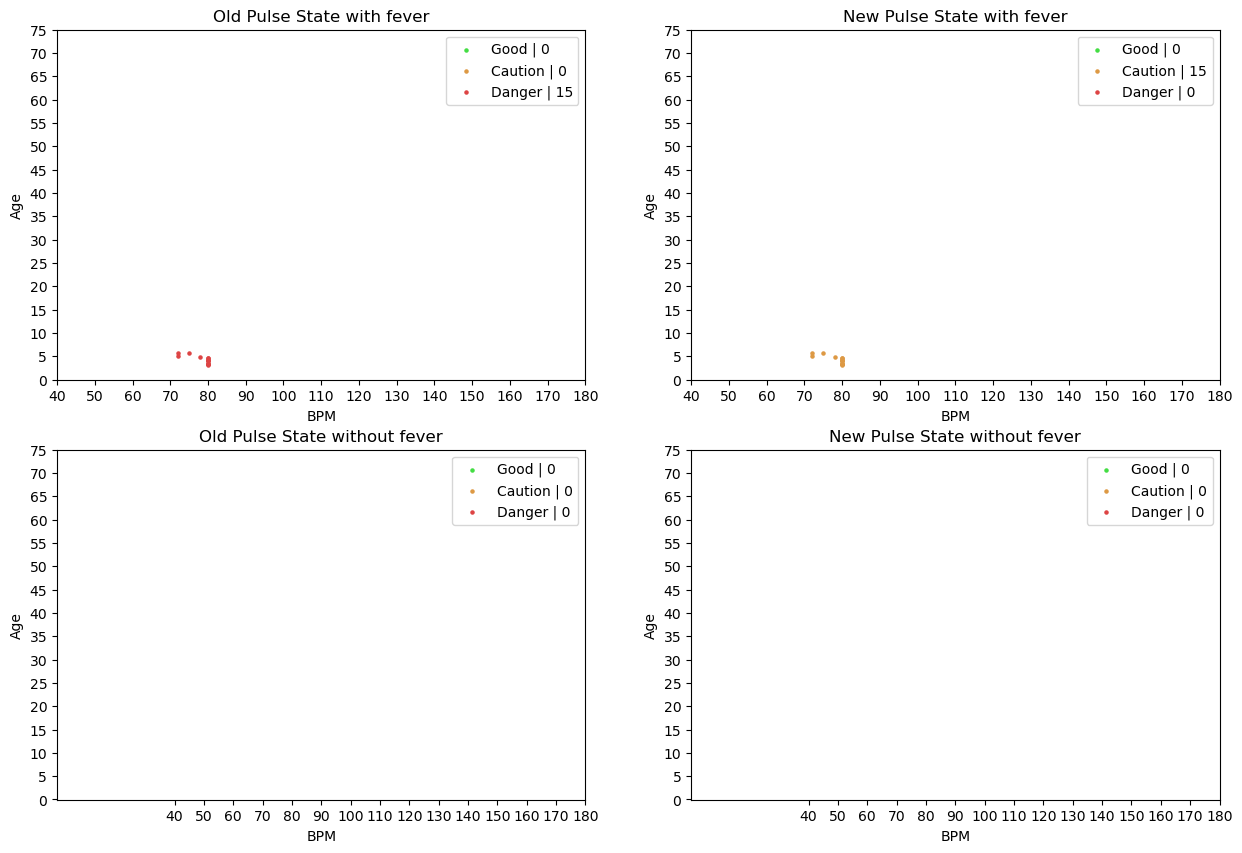

In [52]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
xticks = (40,190,10)
yticks = (0,80,5)
labels = ('Age', 'BPM')
state_labels = ('Good', 'Caution', 'Danger')
create_plot(pulse_list, 'pulseStateOld', 'pulse', 1, 'Old Pulse State with fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,2)
create_plot(pulse_list, 'pulseStateNew', 'pulse', 1, 'New Pulse State with fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,3)
create_plot(pulse_list, 'pulseStateOld', 'pulse', 0, 'Old Pulse State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,4)
create_plot(pulse_list, 'pulseStateNew', 'pulse', 0, 'New Pulse State without fever', *state_labels, *labels, xticks, yticks)
plt.show()

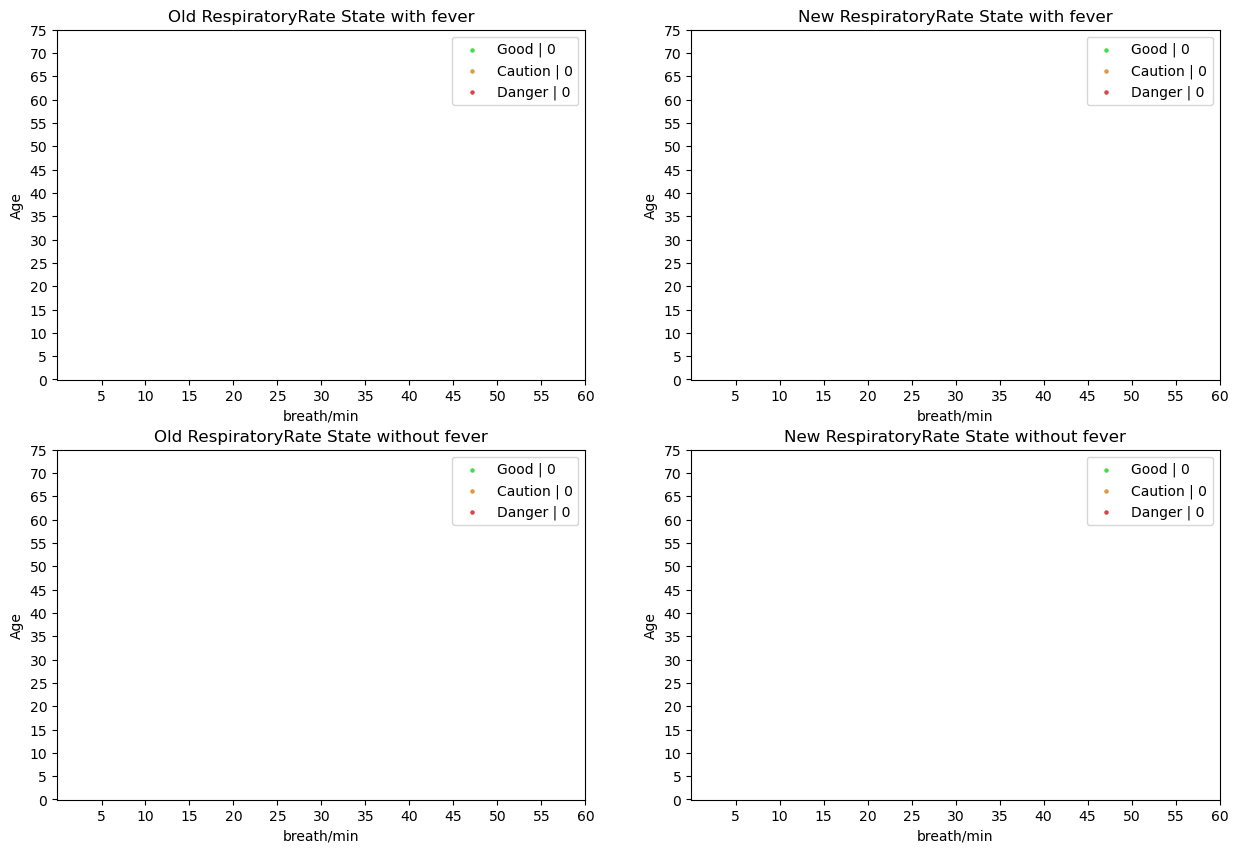

In [53]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
xticks = (5,65,5)
yticks = (0,80,5)
labels = ('Age', 'breath/min')
create_plot(r_rate_list, 'respiratoryRateStateOld', 'respiratoryRate', 1, 'Old RespiratoryRate State with fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,2)
create_plot(r_rate_list, 'respiratoryRateStateNew', 'respiratoryRate', 1, 'New RespiratoryRate State with fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,3)
create_plot(r_rate_list, 'respiratoryRateStateOld', 'respiratoryRate', 0, 'Old RespiratoryRate State without fever', *state_labels, *labels, xticks, yticks)
plt.subplot(2,2,4)
create_plot(r_rate_list, 'respiratoryRateStateNew', 'respiratoryRate', 0, 'New RespiratoryRate State without fever', *state_labels, *labels, xticks, yticks)
plt.show()

In [54]:
df = pd.read_csv('./latest-algo-data.csv', header=[0])

df_og = pd.read_csv('./2020-algo-data.csv', header=[0])

df_2021 = pd.read_csv('./2021-algo-data.csv', header=[0])

In [55]:
# initial filters
df = df[(df['ageInMonths'] > 0) & (df['ageInMonths'] <= 100*12)]
df = df[(df['temperature'] >= 34.5) & (df['temperature'] < 43.5)]
# feature specific filters
df_rr = df[(df['respiratoryRate'] >= 10) & (df['respiratoryRate'] < 80)]
df_ps = df[(df['pulse'] >= 40) & (df['pulse'] < 220)]

# initial filters
df_og = df_og[(df_og['ageInMonths'] > 0) & (df_og['ageInMonths'] <= 100*12)]
df_og = df_og[(df_og['temperature'] >= 34.5) & (df_og['temperature'] < 43.5)]
# feature specific filters
df_og_rr = df_og[(df_og['respiratoryRate'] >= 10) & (df_og['respiratoryRate'] < 80)]
df_og_ps = df_og[(df_og['pulse'] >= 40) & (df_og['pulse'] < 220)]

# initial filters
df_2021 = df_2021[(df_2021['ageInMonths'] > 0) & (df_2021['ageInMonths'] <= 100*12)]
df_2021 = df_2021[(df_2021['temperature'] >= 34.5) & (df_2021['temperature'] < 43.5)]
# feature specific filters
df_2021_rr = df_2021[(df_2021['respiratoryRate'] >= 10) & (df_2021['respiratoryRate'] < 80)]
df_2021_ps = df_2021[(df_2021['pulse'] >= 40) & (df_2021['pulse'] < 220)]

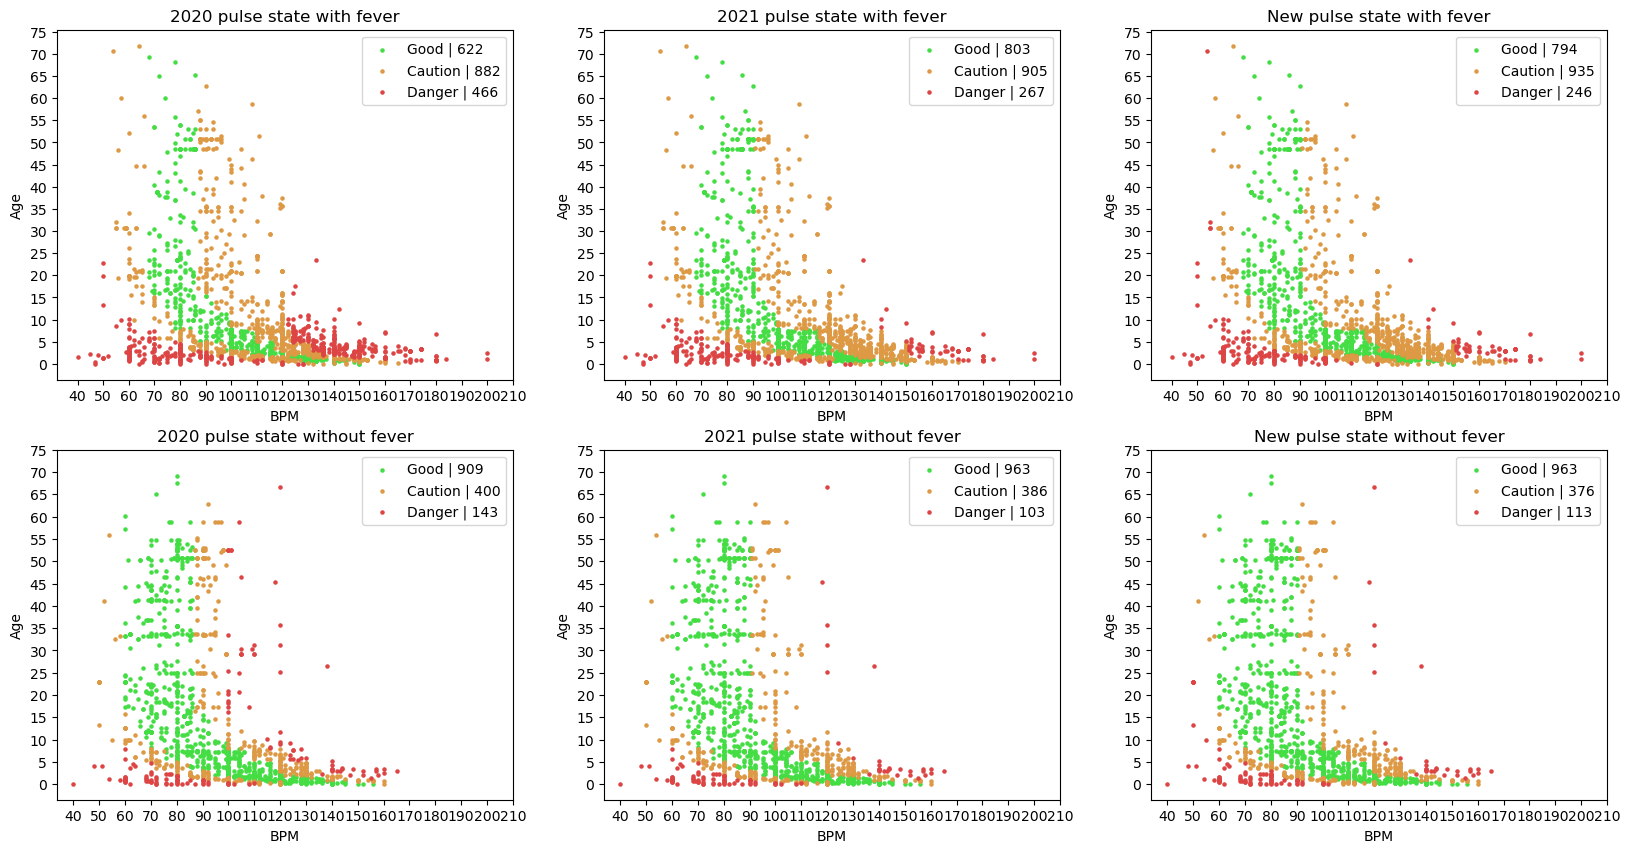

In [56]:
plt.subplots(figsize=(20,10))
xticks = (40,220,10)
yticks = (0,80,5)
plt.subplot(2,3,1)
create_plot_original(df_og_ps, 'pulseState', 'pulse', True, '2020 pulse state with fever', *state_labels, 'Age', 'BPM', xticks, yticks)
plt.subplot(2,3,2)
create_plot_original(df_2021_ps, 'pulseState', 'pulse', True, '2021 pulse state with fever', *state_labels, 'Age', 'BPM', xticks, yticks)
plt.subplot(2,3,3)
create_plot_original(df_ps, 'pulseState', 'pulse', True, 'New pulse state with fever', *state_labels, 'Age', 'BPM', xticks, yticks)
plt.subplot(2,3,4)
create_plot_original(df_og_ps, 'pulseState', 'pulse', False, '2020 pulse state without fever', *state_labels, 'Age', 'BPM', xticks, yticks)
plt.subplot(2,3,5)
create_plot_original(df_2021_ps, 'pulseState', 'pulse', False, '2021 pulse state without fever', *state_labels, 'Age', 'BPM', xticks, yticks)
plt.subplot(2,3,6)
create_plot_original(df_ps, 'pulseState', 'pulse', False, 'New pulse state without fever', *state_labels, 'Age', 'BPM', xticks, yticks)
plt.show()

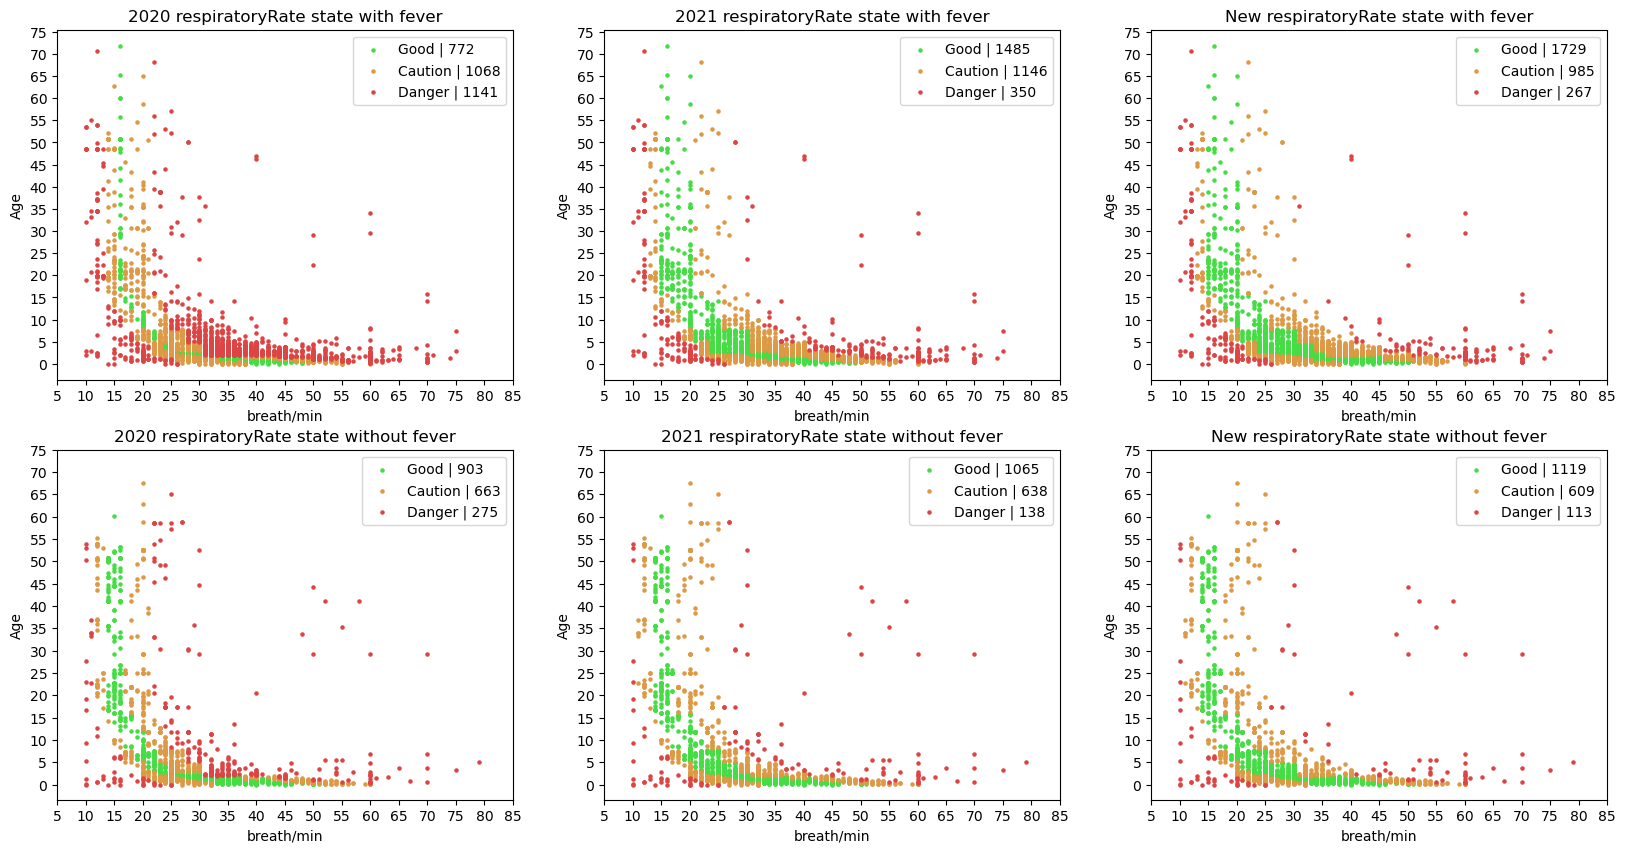

In [57]:
plt.subplots(figsize=(20,10))
xticks = (5,90,5)
plt.subplot(2,3,1)
create_plot_original(df_og_rr, 'respiratoryRateState', 'respiratoryRate', True, '2020 respiratoryRate state with fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(2,3,2)
create_plot_original(df_2021_rr, 'respiratoryRateState', 'respiratoryRate', True, '2021 respiratoryRate state with fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(2,3,3)
create_plot_original(df_rr, 'respiratoryRateState', 'respiratoryRate', True, 'New respiratoryRate state with fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(2,3,4)
create_plot_original(df_og_rr, 'respiratoryRateState', 'respiratoryRate', False, '2020 respiratoryRate state without fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(2,3,5)
create_plot_original(df_2021_rr, 'respiratoryRateState', 'respiratoryRate', False, '2021 respiratoryRate state without fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(2,3,6)
create_plot_original(df_rr, 'respiratoryRateState', 'respiratoryRate', False, 'New respiratoryRate state without fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.show()

In [58]:
# Interactive plots
# %matplotlib qt
%matplotlib inline

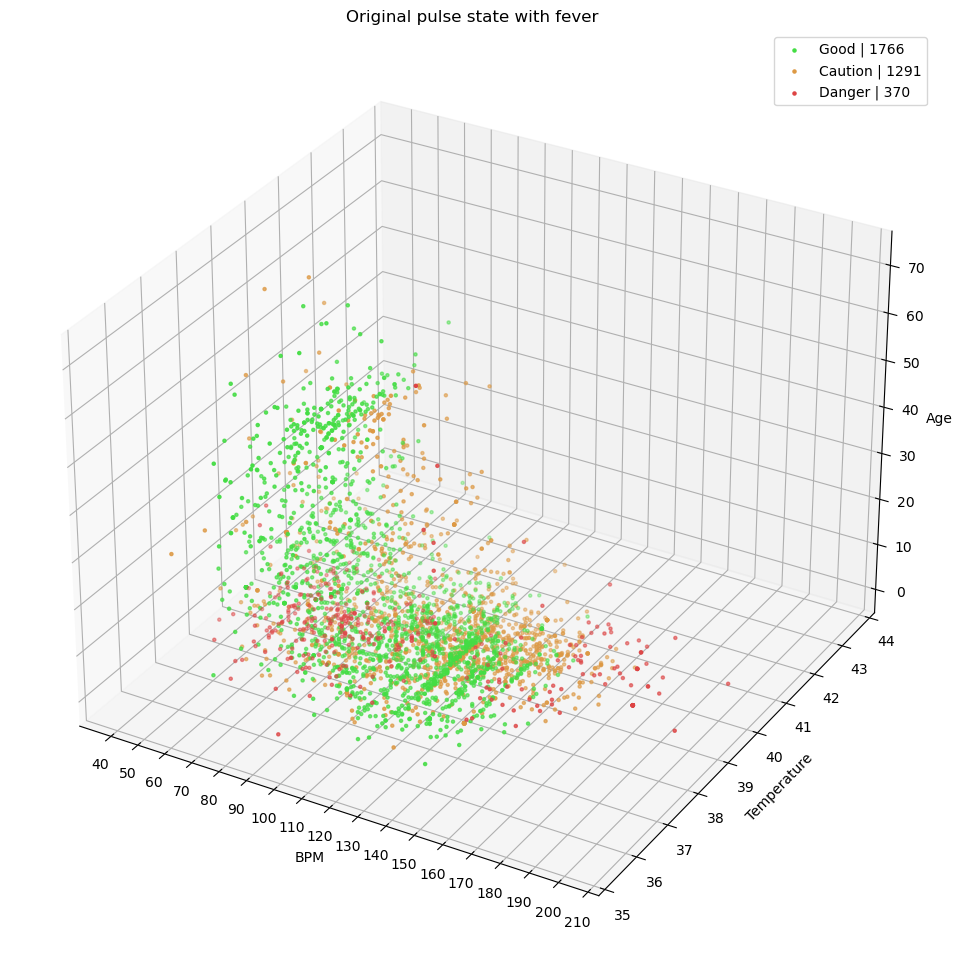

In [59]:
xticks = (40,220,10)
yticks = (35,45,1)
create_plot_3d(df_2021_ps, 'pulseState', 'pulse', True, 'Original pulse state with fever', *state_labels, 'Temperature', 'BPM', xticks, yticks)
plt.show()

In [60]:
def create_bar_chart(dataset, stateKey, key, fever, title, green_label, amber_label, red_label, xlabel, ylabel, xticks):
    fig = plt.figure()
    state_good = dataset[(dataset[stateKey] == 'good') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)].groupby(key).count()['id'].reset_index().dropna()
    state_caution = dataset[(dataset[stateKey] == 'caution') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)].groupby(key).count()['id'].reset_index().dropna()
    state_danger = dataset[(dataset[stateKey] == 'danger') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)].groupby(key).count()['id'].reset_index().dropna()

    #print(state_good, state_caution, state_danger)
    plt.plot(state_good[key], state_good['id'], label=f'{green_label}', color='#44dd44', marker='.')
    plt.plot(state_caution[key], state_caution['id'], label=f'{amber_label}', color='#dd9944', marker='.')
    plt.plot(state_danger[key], state_danger['id'], label=f'{red_label}', color='#dd4444', marker='.')
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    #ax.set_zlabel('Age')
    plt.xticks(np.arange(*xticks))
    plt.legend()

In [61]:
df_ps[df_ps['pulseState'] == 'danger'].groupby(['pulse', 'ageInMonths']).count()['id'].value_counts()

1    333
4      3
2      2
3      1
7      1
Name: id, dtype: int64

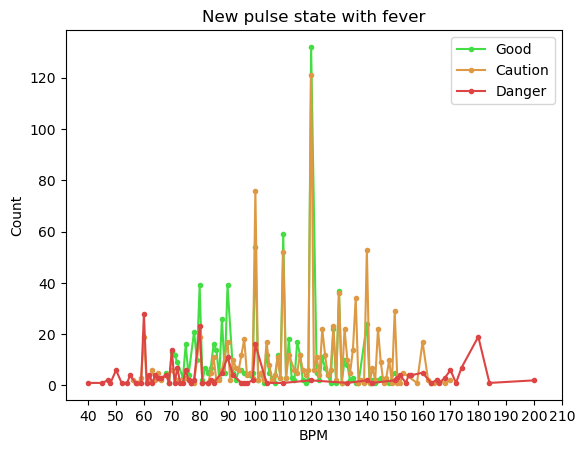

In [62]:
xticks = (40,220,10)
yticks = (35,45,1)
create_bar_chart(df_ps, 'pulseState', 'pulse', True, 'New pulse state with fever', *state_labels, 'Count', 'BPM', xticks)
plt.show()

In [63]:
def create_bar_chart3d(dataset, stateKey, key, fever, title, xlabel, ylabel, state = 'danger', color='#44dd44'):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    state_good = dataset[(dataset[stateKey] == state) & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]

    hist, xedges, yedges =np.histogram2d(state_good[key],state_good['ageInMonths']/12, bins=30)
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")

    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 2 * np.ones_like(zpos)
    dz = hist.ravel()

    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=color)
    plt.show()

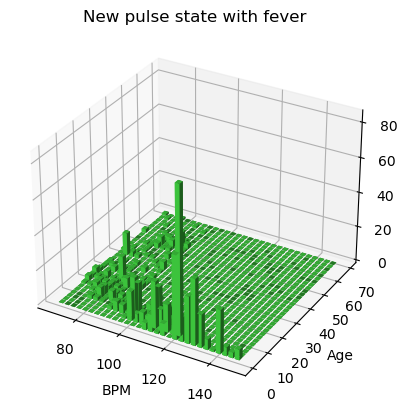

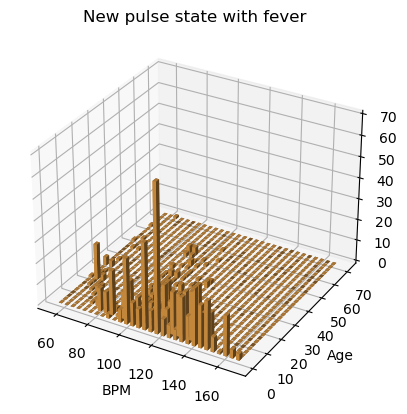

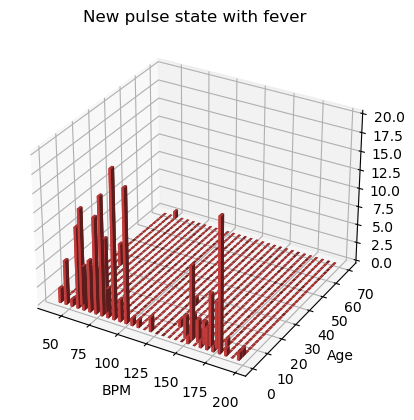

In [64]:
create_bar_chart3d(df_ps, 'pulseState', 'pulse', True, 'New pulse state with fever', 'Age', 'BPM', 'good', '#44dd44')
create_bar_chart3d(df_ps, 'pulseState', 'pulse', True, 'New pulse state with fever', 'Age', 'BPM', 'caution', '#dd9944')
create_bar_chart3d(df_ps, 'pulseState', 'pulse', True, 'New pulse state with fever', 'Age', 'BPM', 'danger', '#dd4444')